#

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
from scipy.optimize import minimize

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/roualdes/data/refs/heads/master/donkeys.csv")

In [6]:
df.head()

Text(0, 0.5, 'Weight (kg)')

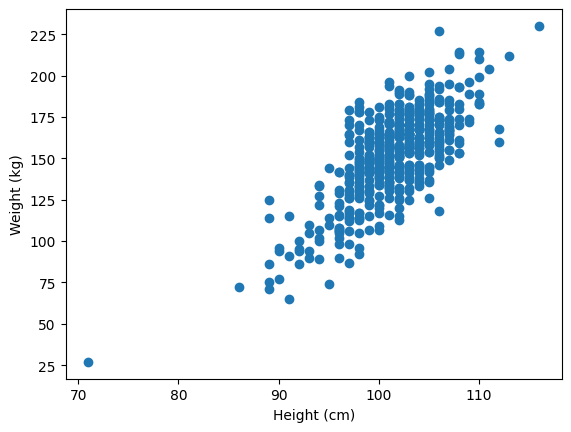

In [7]:
plt.scatter(df["Height"], df["Weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")

In [8]:
def ll_regression(theta, data):
    x = data["x"]
    y = data["y"]
    b0 = theta[0]
    b1 = theta[1]
    return np.sum( (y - (b0 + b1 * x)) ** 2)

In [11]:
def ll_grad(theta, data):
    x = data["x"]
    y = data["y"]
    b0 = theta[0]
    b1 = theta[1]
    lm = b0 + b1 * x
    db0 = np.sum(y - lm)
    db1 = np.sum( x * (y - lm) )
    return -2 * np.array([db0, db1])

In [39]:
rng = np.random.default_rng()
init = rng.normal(size = 2)
d = {
    "x": df["Height"],
    "y": df["Weight"]
}
o = minimize(ll_regression, init, jac = ll_grad, args = (d,))

In [43]:
np.sum(o.x * np.array([1, 120]))

237.0145972963091

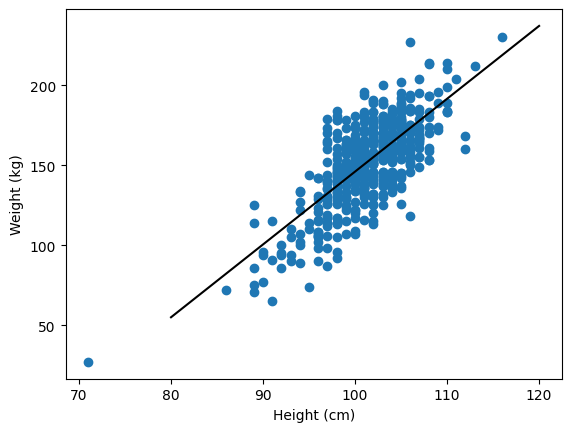

In [45]:
plt.scatter(df["Height"], df["Weight"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
x1 = np.sum(o.x * np.array([1, 120]))
x0 = np.sum(o.x * np.array([1, 80]))
yhat = np.array([x0, x1])
x = np.array([80, 120])
plt.plot(x, yhat, color = "black");

In [46]:
o.x[0]

-309.30049352770055